In [50]:
# Import stuff
%matplotlib inline
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import random
import copy
import math
import pandas as pd
from networkx import grid_graph
import statistics



# DATASETS ARE INCLUDED AT THE BOTTOM IN THE FORM OF ARRAYS.


In [39]:
"""Model Parameters, important to be initialized at the start for a reference""" 
# number_of_nodes = 50
# number of days till incubation
iDays = 2
# prob oof ndoe becoming symptomatic
c_prob = 1/5
# total days in sim
steps = 120
# sample test size
sample = 5
# prob of infection
prob = 0.01
# prob of removal
rprob = 1/14
# ignoroe
sym_prob = 0/200
# ignroe
d_prob = 0/200
# intial infected
initialInfected = 10
# positively tested
testPositive = 0
# generally tested
testedGeneral = 0
# x array
x = []
# infected arrray
y = []
# suscetable aray
sY = []
# removed array
rY = []
# symptomatic array
cY = []
# ignore
qY = []
# ignore
dY = []
# family infected array
fY = []
# ignore
f2Y = []
# ignore
rGraph = []
# nodes list
nodes = []
# diseased list for sample selecting
diseased = []
# test sample list to be tested
test_sample = []
# dictionaries for family assignements
familyDict = dict()
infectedDict = dict()
faminfectedDict = dict()
referenceDict = dict()
# infected counter
initial = 10
# family graph storage
famGraph = []


# list that stores first wave infections
lfn = []

# prob of a family infection(ignore always assume same value as infection prob)
famProb = 0.02


# infectionn type counterr
preInfected = 0
sympInfected = 0

# quarantined type counter
preQ = 0
sympQ = 0

# families in total
families = 0

# ignore, for recording data
xvals = []
yvals = []

barPeak = []
std = []
# totalViral = 20


In [40]:
'''Generates degree distributed family graph(not relevant for project)'''
def generateDegreeDistributedFamilyGraph(num_nodes, familyProb):
    graph1 = nx.Graph()
    # def generateGraph():

    # Graph generation
    n = num_nodes
    p = 0.001
    # probability of next cluster being a family
#     familyProb = 0.3
    graph1 = nx.Graph()        
    degrees = generate_power_law_degrees(num_nodes, 1, 6, 0.4)
    nodes_multiple = np.concatenate([np.full(degree, i) for i, degree in enumerate(degrees)])
    np.random.shuffle(nodes_multiple)
    if nodes_multiple.shape[0] % 2 == 1:
        nodes_multiple = nodes_multiple[:-1]
    edges = nodes_multiple.reshape((nodes_multiple.shape[0] // 2, 2))
#     graph1 = nx.MultiGraph()
    graph1.add_nodes_from(np.arange(num_nodes))
    graph1.add_edges_from(edges)
    # node index
    curr = 0
    equalizer = 1
    print(familyProb)
    while curr <= n:
        if random.random() <= familyProb:
            for iterator in range(equalizer):
                graph1.add_node(curr+iterator)
                familyDict[curr+iterator] = list([-1])
            curr+=equalizer
            equalizer = 0
#             print(curr)
        else:
            limit = random.randint(4, 8)
            equalizer = limit
            for i in range(limit):
                for j in range(limit):
                    graph1.add_edge(curr+i, curr+j)
                    if curr+i in familyDict:
                        b = list(familyDict[curr+i])
                        b.append(curr+j)
                        familyDict[curr+i] = b
                    else:
                        familyDict[curr+i] = [curr+j]
            curr+=limit    
    return graph1


In [41]:
'''Generates scale free graph(not relevant for project)'''
def generateDegreeDistributedGraph(num_nodes):
    degrees = generate_power_law_degrees(num_nodes, 1, 6, 0.4)
    nodes_multiple = np.concatenate([np.full(degree, i) for i, degree in enumerate(degrees)])
    np.random.shuffle(nodes_multiple)
    if nodes_multiple.shape[0] % 2 == 1:
        nodes_multiple = nodes_multiple[:-1]
    edges = nodes_multiple.reshape((nodes_multiple.shape[0] // 2, 2))
    graph1 = nx.Graph()
    graph1.add_nodes_from(np.arange(num_nodes))
    graph1.add_edges_from(edges)
    
    for iteration in range(num_nodes):
        familyDict[iteration] = list([-1])
    
    return graph1
    

In [42]:
'''Generates family graph for simulation'''
def generateFamilyGraph(num_nodes, p_val):
    familyProb = 0.2

    
    global families
    
    
    n=num_nodes
    p=p_val

    graph1 = nx.Graph()

    # node index
'''Assigning Families'''
    curr = 0
    equalizer = 1
    print(familyProb)
    while curr <= n:
        if random.random() <= familyProb:
            for iterator in range(equalizer):
                graph1.add_node(curr+iterator)
                familyDict[curr+iterator] = list([-1])
            curr+=equalizer
            equalizer = 0
#             print(curr)
        else:
            families +=1
            limit = random.randint(4, 8)
            equalizer = limit
            for i in range(limit):
                for j in range(limit):
                    graph1.add_edge(curr+i, curr+j)
                    if curr+i in familyDict:
                        b = list(familyDict[curr+i])
                        b.append(curr+j)
                        familyDict[curr+i] = b
                    else:
                        familyDict[curr+i] = [curr+j]
            curr+=limit    

    
    for i in range(num_nodes+30):
        faminfectedDict[i] = 0
        infectedDict[i] = 0

'''Assigning random links within families'''
    w = -1
    lp = math.log(1.0 - p)
    v = 1
    while v < n:
        lr = math.log(1.0 - random.random())
        w = w + 1 + int(lr/lp)
        while w >= v and v < n:
            w = w - v
            v = v + 1
        if v < n:
            graph1.add_edge(v, w)
            
    return graph1


IndentationError: unexpected indent (<ipython-input-42-ab27807a39fd>, line 16)

In [ ]:
'''Generate random GNP graph'''
def generateRandomGraph(num_nodes, p_val):
    graph1 = nx.fast_gnp_random_graph(num_nodes, p_val)
    for i in range(num_nodes):
        familyDict[i] = [-1]
        infectedDict[i] = 0
        faminfectedDict[i] = 0
        
    return graph1

In [ ]:
'''Power law degrees distributor, not relevant'''
def generate_power_law_degrees(n, min_degree, mean_degree, gamma):
    assert gamma >= 0
    power_law_values = 1 / np.random.random(n)**gamma - 1 + 1e-10
    value_mean = np.mean(power_law_values)
    frac_degrees = min_degree + power_law_values / value_mean * (mean_degree - min_degree)
    int_degrees = frac_degrees.astype(int) + (np.random.random(n) < (frac_degrees %1))
    return int_degrees

In [ ]:
'''Draws distribution of nodes, not relevant'''
def drawDistribution(graph):
    arr = list()
    for i in graph.nodes():
        nbrs = list(graph.neighbors(i))
        arr.append(len(nbrs))
        
    
    plt.xlabel("degree of node")
    plt.ylabel("number of nodes")
    plt.title("Degree Distribution")
    df = pd.DataFrame({'freq': list(arr)})
    df.groupby('freq', as_index=False).size().plot(kind='bar')
    plt.autoscale()
    plt.show()

In [ ]:
'''Class that represents a singular node'''
class nodeClass:
    
# initialize all fields
    def __init__(self, i):
        self.node_id = i
        self.number = 0
        self.condition = "s"
        self.neighbors = list(G.neighbors(i))
        self.tested = False
        self.virus = False
        self.state = 'n'
        self.family = familyDict[i]
        self.hadVirus = False

# changes condition to specified condition
    def changeCondition(self, c):
        self.condition = c
        
# Increments day of being infected for node
    def incrementDay(self):
        self.number=self.number+1
# resets nodes into susceptible
    def reset(self):
        self.condition = "s"
        self.number=0
        self.virus = False
        self.tested = False
# lowers neighbors into self isolation
    def lowerNeighbors(self):
        self.state = 'c'
    
# checks neighboors for infection
    def checkNeighbors(self, tst, st, c):
        new = copy.deepcopy(st)
        nbrs = copy.deepcopy(self.neighbors)
        
        
        
        if self.state == 'q':
            return st
        elif self.state == 'c':
            placeholder= 0
# next 4 lines are the self isolation portion of code, comment out to see non self-isolation simulation
            if self.family[0]!= -1:
                nbrs = self.family
            else:
                return st
# Infection of all neighbors
        global famProb
        for nbr in nbrs:
            prob1 = prob
            if nbr in self.family:
                prob1 = famProb
            
            global initial
            
            
            if random.random() <= prob1 and (st[nbr].condition == 's' or st[nbr].condition == 'c') and st[nbr].virus == False:
                
                
                
                if self.node_id in infectedDict:
                    infectedDict[self.node_id] = infectedDict[self.node_id] + 1
                else:
                    infectedDict[self.node_id] = 1
                    
                if nbr in self.family:
                    if self.node_id in faminfectedDict:

                        faminfectedDict[self.node_id] = faminfectedDict[self.node_id] + 1
                    else:
                        faminfectedDict[self.node_id] = 1
                       
                if self.node_id in lfn:
                    initial+=1

# set end conditions
                global sympInfected
                global preInfected
                if (self.condition == 'c'):
                    sympInfected+=1
                elif (self.condition == 'i'):
                    preInfected+=1
                new[nbr].changeCondition(c)
                new[nbr].virus = True
                new[nbr].hadVirus = True
                
        return new
    
# test process for singular node
    def test(self, st):
        global testedGeneral
        global testPositive
        
        global preQ 
        global sympQ
        
        testedGeneral += 1
        
        new = copy.deepcopy(st)
        if self.hadVirus:
            self.state = 'q'
            testPositive +=1
            if self.condition == 'c':
                sympQ+=1
            elif self.condition == 'i':
                preQ+=1
                
            new[self.node_id].state = 'q'
            new[self.node_id].tested = True
        return new
    
# condition called in test trace, not the most relevant
    def test1(self):
        global testedGeneral
        global testPositive
        
        global preQ 
        global sympQ
        
        testedGeneral += 1
        if self.hadVirus:
            self.state = 'q'
            testPositive +=1
            if self.condition == 'c':
                sympQ+=1
            elif self.condition == 'i':
                preQ+=1
        
            self.tested = True
            
        

# Test and trace node
    def trace(self, st):
        
        global preQ 
        global sympQ
        
        global testedGeneral
        global testPositive
        new = copy.deepcopy(st)
        testedGeneral += 1
        if self.hadVirus:
            self.state = 'q'
            testPositive +=1
            new[self.node_id].state = 'q'
            new[self.node_id].tested = True
            
            if self.condition == 'c':
                sympQ+=1
            elif self.condition == 'i':
                preQ+=1
            
            for nbr in self.family:
                new[nbr].test1()
        return new
        
        
        
# returns number of neighbors
    def getDegree(self):
        return len(list(self.neighbors))
    
     

In [ ]:
'''Runs simulation portioon of code'''
def runSimulation(G):
    
    totalViral = 0
    nodes = list()
    for i in G.nodes():
        nodes.append(nodeClass(i))
#     setting up initial infected
    for num in range(initialInfected):
        val = random.randint(0, G.number_of_nodes()-1)
        nodes[val].condition = 'i'
        nodes[val].virus = True
        lfn.append(val)

#     iterating through all steps(120
    for t in range(steps):

        counter = 0
        sCounter = 0
        rCounter = 0
        cCounter = 0
        qCounter = 0
        dCounter = 0
        fCounter = 0
        totalSum = 0
        iCounter = 0
        f2Counter = 0
        
        

        faminfectedDict.clear()
        infectedDict.clear()
#         Iterating through all nodes in the graph
        for p in G.nodes():
            
            
            '''Record Values'''
            if nodes[p].virus:
                counter=counter+1
            if nodes[p].condition == 's' and nodes[p].virus == False:
                sCounter = sCounter+1
            if nodes[p].condition == 'r':
                rCounter = rCounter+1
            if nodes[p].condition == 'c':
                cCounter = cCounter+1
            if nodes[p].state == 'q':
                qCounter = qCounter+1
            if nodes[p].condition == 'd':
                dCounter = dCounter+1
            
            if (nodes[p].condition == 'c' or nodes[p].condition == 'i') and nodes[p].virus == True:
                iCounter+=1

            
            
        totalViral = totalViral + counter
        x.append(t)
        y.append(counter)
        
        sY.append(sCounter)
        rY.append(rCounter)
        cY.append(cCounter)
        qY.append(qCounter)
        dY.append(dCounter)


        
        tnodes = copy.deepcopy(nodes)
# Runs main simulation process on all nodes
        for snd in G.nodes():
            changeNode = nodes[snd]
            currNode = tnodes[snd]

# Condition checking if node is susceptible
            if currNode.condition == 's':
        
#         IMPORTANT: LEAVE THIS PART UNCOMMENTED OUT FOR MASS TESTING BUT COMMMENTED OUT FOR SYMPTOMATIC AND CNOTACT TRACING
#                 diseased.append(currNode)
                if random.random() <= sym_prob:
                    changeNode.condition = 'c'
                    changeNode.lowerNeighbors()

# Condition checking if node is exposed and in incubation
            elif currNode.condition == 'v':
        
        
#         IMPORTANT: LEAVE THIS PART UNCOMMENTED OUT FOR MASS TESTING BUT COMMMENTED OUT FOR SYMPTOMATIC AND CNOTACT TRACING
        
#                 diseased.append(currNode)
                if currNode.number == iDays:
                    changeNode.condition = 'i'
                    changeNode.tested = False
                elif random.random() <= rprob:
                    changeNode.condition = 'r'
                    changeNode.virus = False
                changeNode.incrementDay()
                

# Conditioon checking if node is presymptomatic but infectuous
            elif currNode.condition == 'i':
        
        
#         IMPORTANT: LEAVE THIS PART UNCOMMENTED OUT FOR MASS TESTING BUT COMMMENTED OUT FOR SYMPTOMATIC AND CNOTACT TRACING
#                 diseased.append(currNode)
                if random.random() < c_prob:
                    changeNode.condition = 'c'
                    changeNode.lowerNeighbors()
                elif random.random() <= rprob:
                    changeNode.condition = 'r'
                    changeNode.virus = False
                changeNode.incrementDay()
                nodes = currNode.checkNeighbors(tst= tnodes, st=nodes, c='v')
                
                
# Conditioon checking if node is symptomoatic but infectuous
            elif currNode.condition == 'c':
                changeNode.incrementDay()

                if currNode.virus:

                    if random.random() <= d_prob:
                        changeNode.condition = 'd'
                        changeNode.virus = False 
                    elif random.random() <= rprob:
                        changeNode.condition = 'r'
                        changeNode.virus = False
                    else:
                        diseased.append(currNode)
                        
                    nodes = currNode.checkNeighbors(tst= tnodes, st=nodes, c='v')  
                        
                else:
                    diseased.append(currNode)
                        


    
# Sampling process of code
        if (t % 2 == 0):
#             print("hi")
            iterator = 0
            while (iterator < sample):
                if (len(diseased) > 0):
                    addNode = diseased.pop(random.randint(0, len(diseased)-1))
                    if addNode.tested == False:
                        test_sample.append(addNode)
                        iterator=iterator+1
                else:
                    break
        # testing process of sample, nodes.trace for contact tracing and nodes.test for mass and symptomatic testing
            for i in test_sample:
                nodes = nodes[i.node_id].trace(nodes)
#                 nodes = nodes[i.node_id].test(nodes)

            test_sample.clear()
            diseased.clear()

    
    
    
# Infected families counter
        fam = 0
        while (fam<len(familyDict)):
            if nodes[fam].virus:
                if familyDict[fam] == [-1]:
                    fam = fam+1
                else:
                    fCounter=fCounter+1
                    fam = max(familyDict[fam])+1
            else:
                fam = fam+1

        

# Completely infected familiess counter
        fam = 0
        while (fam<len(familyDict)):
            if not (nodes[fam].virus):
                if familyDict[fam] == [-1]:
                    fam = fam+1
                else:
                    fam = max(familyDict[fam])+1
            else:
                if fam == max(familyDict[fam]):
                    f2Counter+=1
                fam = fam+1
                
        
        
        
        fY.append(fCounter)
        f2Y.append(f2Counter)
        
        
# record final values
        s = 0
        for eva in infectedDict:
            s+=infectedDict[eva]
        if iCounter == 0:
            rGraph.append(0)
        else:
            rGraph.append((s/iCounter))
        s = 0
        for eva in faminfectedDict:
            s+=faminfectedDict[eva]
            
        if iCounter == 0:
            famGraph.append(0)
        else:
            famGraph.append((s/iCounter))

    
    return totalViral





In [43]:
# Analyze SIR Graph of code and print peak values
def analyzeModel(graph_title, totalViral):
    quotients = [number / 500 for number in fY]
    
    for i in range(len(y)):
        y[i] = y[i]/800
    for i in range(len(y)):
        sY[i] = sY[i]/800
    for i in range(len(y)):
        rY[i] = rY[i]/800
        
        
        
    fig = plt.figure(figsize=(10, 5))
    ax = fig.add_subplot(111)

    ax.scatter(x, y, label = 'Infected')

    ax.scatter(x, sY, label = 'Susceptible')
    ax.scatter(x, rY, label = 'Removed')
    plt.xlabel("Time")

    plt.legend()
    plt.title(graph_title)
    
    print("peak:", max(y))

    
    finalSum = 0
    for things in infectedDict:
        finalSum+=infectedDict[things]
        
    

    
    
    plt.ylabel("Percentage of Nodes")
    plt.show()
    
    

    yvals.append(max(y) + max(y) + y[len(y)-1])


In [44]:
# Analyze infected families graph of code
def analyzeFamilySpread(graph_title, totalViral):
    quotients = [number / 500 for number in fY]
    
    fig = plt.figure(figsize=(10, 5))
    ax = fig.add_subplot(111)
    
    ax.scatter(x, fY, label = 'Number of Families Infected')
    
    global sample 
    print("sample:", sample)
    print("top:", max(y), "yote:", max(fY)/105)
    print("Sym:", sympInfected/800, "Pre:", preInfected/800)
    bruhy.append(max(fY)/families)

    plt.xlabel("Time")

    plt.legend()
    plt.title(graph_title)
    plt.ylabel("Fraction of Families")

    plt.show()
    
    
    
    
    
    

In [45]:
# Resets all lists for new simuulatioon
def resetLists():
    x.clear()
    y.clear()
    sY.clear()
    rY.clear()
    cY.clear()
    qY.clear()
    fY.clear()
    f2Y.clear()
    rGraph.clear()
    famGraph.clear()
    infectedDict.clear()
#     totalViral = 0
    lfn = []
    global initial
    initial = 0
    dY.clear()
    nodes.clear()
    diseased.clear()
    test_sample.clear()
    familyDict.clear()
    preInfected = 0
    sympInfected =0

# Simulations


In [37]:
# Here is the code for most of my simulations. I deleted a lot of the datacollection process of the simulations 
# because it was way too messy and not understandable. Instead I simplified the simulations to a very easy to look at it
# if you actually run the simulation however, you would have to comment out specific sectioons. However, the code should
# be easily undestandable and all data is recorded in the paper already, so there is no need really to run these simulations.

In [ ]:
# Family Graph without self isolation(Comment out the self isolation portion in the node class)
prob = 0.05
famProb = 0.05
sample = 0
testPositive = 0
testedGeneral = 0
famillies = 0
resetLists()
G = generateFamilyGraph(800, 0.006)
xvals.append(prob)
viral = runSimulation(G)
analyzeModel("Spread Through Family Network", viral)
analyzeFamilySpread("Spread of Infected Families", 100)



In [ ]:
# Randomo graph without self isolation(Comment out the self isolation portion in the node class)
prob = 0.05
famProb = 0.05
sample = 0
testPositive = 0
testedGeneral = 0
famillies = 0
resetLists()
G = generateRandomGraph(800, 0.0095)
xvals.append(prob)
viral = runSimulation(G)
analyzeModel("Spread Through Family Network", viral)
analyzeFamilySpread("Spread of Infected Families", 100)


In [27]:
# Family Graph with self isolation(Uncomment out the self isolation portion in the node class)
prob = 0.05
famProb = 0.05
sample = 0
testPositive = 0
testedGeneral = 0
famillies = 0
resetLists()
G = generateFamilyGraph(800, 0.006)
xvals.append(prob)
viral = runSimulation(G)
analyzeModel("Spread Through Family Network", viral)
analyzeFamilySpread("Spread of Infected Families", 100)



NameError: name 'x' is not defined

# Symptomatic Testing

In [ ]:
# Comment out specified instructions in Run Simulation portion of the code to do symptomoatic testing
sample = 0

while (sample <= 192):
    preQ = 0
    sympQ = 0
    prob = 0.06
    famProb = 0.06
    families = 0
    sympInfected = 0
    preInfected = 0
    testPositive = 0
    testedGeneral = 0
    resetLists()
    G = generateFamilyGraph(800, 0.006)

    # drawDistribution(G)
    xvals.append(prob)
    viral = runSimulation(G)
    analyzeModel("Spread Through Family Network", viral)
    analyzeFamilySpread("Spread of Infected Families", 100)

    sample+=16

# Mass Testing

In [ ]:
# Comment out specified instructions in Run Simulation portion of the code to do mass testing
sample = 0

while (sample <= 192):
    preQ = 0
    sympQ = 0
    prob = 0.06
    famProb = 0.06
    families = 0
    sympInfected = 0
    preInfected = 0
    testPositive = 0
    testedGeneral = 0
    resetLists()
    G = generateFamilyGraph(800, 0.006)
    xvals.append(prob)
    viral = runSimulation(G)
    analyzeModel("Spread Through Family Network", viral)
    analyzeFamilySpread("Spread of Infected Families", 100)

    
    
    sample+=16

# Contact Tracing

In [ ]:
# Comment out specified instructions in Run Simulation portion of the code to do contact tracing
sample = 2

while (sample <= 36):
    preQ = 0
    sympQ = 0
    prob = 0.06
    famProb = 0.06
    families = 0
    sympInfected = 0
    preInfected = 0
    testPositive = 0
    testedGeneral = 0
    resetLists()
    G = generateFamilyGraph(800, 0.006)

    # drawDistribution(G)
    xvals.append(prob)
    viral = runSimulation(G)
    analyzeModel("Spread Through Family Network", viral)
    analyzeFamilySpread("Spread of Infected Families", 100)

    
    
    sample+=2

#  Plots and Data Entering(Feel free to ignore because too messy)

In [ ]:
# this sectioon is just me plotting specific values into graphs and plots. It is very messy so feel free to ignore it. 
# all the graphs can be fuond in the paper. Dataset is at the very bottom.

In [31]:
bruhy = []

In [32]:
bruhx = []
hi = 0
while hi < 0.044:
    bruhx.append(hi)
    hi+=0.001

In [258]:
yeety = [0.0125, 0.0125, 0.01125, 0.015, 0.01375, 0.0125, 0.0125, 0.01375, 0.0175, 0.01375, 0.0225, 0.02875, 0.03, 0.04, 0.0775, 0.02375, 0.07625, 0.06, 0.1075, 0.1275, 0.12875, 0.11875, 0.09875, 0.21, 0.20375, 0.19875, 0.20875, 0.175, 0.21375, 0.2125, 0.255, 0.2325, 0.27125, 0.295, 0.28, 0.3075, 0.31125, 0.255, 0.29875, 0.30375, 0.38, 0.3425, 0.3525, 0.33875, 0.35, 0.39, 0.34, 0.4, 0.41, 0.42, 0.39, 0.49]



In [245]:
print(len(xvalues))

52


In [259]:
print(len(yeet2y))

52


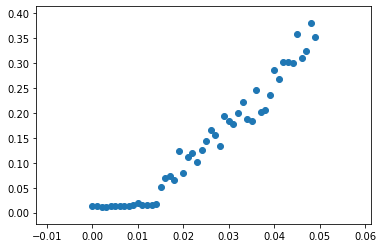

In [54]:
plt.scatter(bruhx, bruhy)

In [96]:
# recorded data for symptomatic testing

# curve peak
st1 = [0.28, 0.18875, 0.17, 0.2025, 0.1775, 0.21125, 0.2025, 0.2525, 0.20625, 0.205, 0.205, 0.1987, 0.2325]
# family curve peak
st2 = [0.863, 0.73725, 0.56375, 0.56625, 0.5825, 0.5975, 0.54624, 0.62, 0.69, 0.66, 0.6, 0.64, 0.7212]
# presymptoomatic infections
st3 = [0.61, 0.57, 0.56, 0.56625, 0.5825, 0.5975, 0.54625, 0.5825, 0.57875, 0.63875, 0.61875, 0.634, 0.62375]

In [28]:
# Recorded Datasets
xax = []
al = 0.0
while al <= 0.09:
    al+=0.001
    xax.append(al)
xvalues = [0, 0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008, 0.009, 0.01, 0.011, 0.012, 0.013, 0.014, 0.015, 0.016, 0.017, 0.018, 0.019, 0.02, 0.021, 0.022, 0.023, 0.024, 0.025, 0.026, 0.027, 0.028, 0.029, 0.03, 0.031, 0.032, 0.033, 0.034, 0.035, 0.036, 0.037, 0.038, 0.039, 0.04, 0.041, 0.042, 0.043, 0.044, 0.045, 0.046, 0.047, 0.048, 0.049, 0.05, 0.06]
famYax= [0.0125, 0.0136, 0.0125, 0.0158, 0.0159, 0.0173, 0.018, 0.0163, 0.0147, 0.023, 0.02, 0.0321, 0.0219, 0.018, 0.069, 0.0875, 0.097, 0.014, 0.0121, 0.0163 ,0.165, 0.162, 0.138, 0.188, 0.199, 0.1925, 0.246, 0.233, 0.25, 0.212, 0.2537, 0.27, 0.287, 0.335, 0.319, 0.289, 0.357, 0.387, 0.396, 0.387, 0.372, 0.375, 0.391, 0.388, 0.412, 0.379, 0.372, 0.42, 0.387, 0.392, 0.421, 0.4187, 0.4276, 0.512, 0.38, 0.421, 0.421, 0.4319, 0.4197, 0.382, 0.42125, 0.43, 0.412, 0.423, 0.442, 0.376, 0.42, 0.42, 0.462, 0.451, 0.432 ,0.45, 0.46, 0.52, 0.435, 0.492, 0.512, 0.47, 0.501, 0.481, 0.521, 0.51, 0.462, 0.392, 0.521, 0.5225, 0.562, 0.503, 0.553, 0.542]
yax = [0.0125, 0.0125, 0.0125, 0.0134, 0.0125, 0.0142, 0.013, 0.018, 0.013, 0.017, 0.02, 0.02625, 0.0275, 0.0287, 0.0371, 0.0472, 0.0538, 0.0421, 0.031, 0.052,0.13, 0.083, 0.098, 0.062, 0.121, 0.132, 0.173, 0.093, 0.182, 0.212, 0.183, 0.172, 0.132, 0.221, 0.183, 0.213, 0.198, 0.243, 0.221, 0.273, 0.287, 0.263, 0.234, 0.257, 0.289, 0.297, 0.271, 0.252, 0.298, 0.312, 0.314, 0.332, 0.297, 0.263, 0.334, 0.312, 0.363, 0.388, 0.323, 0.41, 0.354, 0.372, 0.334, 0.392, 0.387, 0.392, 0.372, 0.389, 0.412, 0.412, 0.421, 0.398, 0.425, 0.423, 0.411, 0.398, 0.352, 0.425, 0.431, 0.421, 0.411, 0.421, 0.421, 0.387, 0.429, 0.423, 0.412, 0.425, 0.462, 0.412]
yvalues = [0.0467, 0.089, 0.0561, 0.127, 0.2315, 0.2353, 0.3237, 0.3637, 0.387, 0.421, 0.408, 0.47, 0.53, 0.52, 0.52, 0.54, 0.56, 0.55, 0.52, 0.53, 0.57, 0.62, 0.59, 0.63, 0.61, 0.67, 0.68, 0.7, 0.68, 0.73, 0.71, 0.75, 0.9, 0.82, 0.79, 0.81, 0.81, 0.69, 0.83, 0.87, 0.85, 0.82, 0.87, 0.90, 0.72, 0.9, 0.912, 0.93, 0.83, 0.91, 0.9, 0.87, 0.87, 0.88, 0.83, 0.91, 0.95, 0.92, 0.93, 0.97, 0.96, 0.92, 0.94, 0.96, 0.92, 0.94, 0.95, 0.92, 0.95, 0.96, 0.93, 0.93, 0.93, 0.95, 0.96, 0.97, 0.98, 0.92, 0.94, 0.96, 0.97, 0.98, 0.95, 0.98, 0.96, 0.96, 0.98, 0.97, 0.99, 0.97]

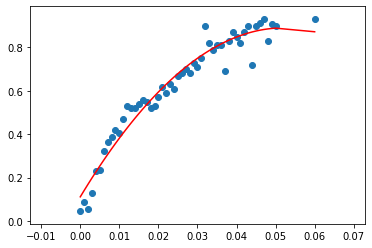

In [197]:
model1 = np.polyfit(xvalues, yvalues, 2)
predict = np.poly1d(model1)
x_lin_reg = xvalues
y_lin_reg = predict(x_lin_reg)
plt.scatter(xvalues, yvalues)
plt.plot(x_lin_reg, y_lin_reg, c = 'r')
# plt.scatter(xvalues,yvalues)

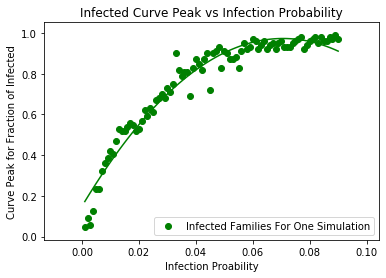

In [327]:
# plt.scatter(xvalues, yeety)
# plt.plot(x_lin_reg, y_lin_reg, c = 'g')

# model3 = np.polyfit(xax, famYax, 2)
# predict3 = np.poly1d(model3)
# x_lin_reg3 = xax
# y_lin_reg3 = predict3(x_lin_reg3)
# plt.scatter(xax,famYax, c = 'b', label = 'One Family Network Simulation')
# # plt.plot(x_lin_reg3, y_lin_reg3, c = 'b', label = "Best Fit Line For Family Network")
# plt.plot(x_lin_reg3, y_lin_reg3, c = 'b')


# model2 = np.polyfit(xax, yax, 2)
# predict2 = np.poly1d(model2)
# x_lin_reg2 = xax
# y_lin_reg2 = predict2(x_lin_reg2)
# plt.scatter(xax,yax, c = 'r', label = 'One Random Network Simulation')
# # plt.plot(x_lin_reg2, y_lin_reg2, c = 'r', label = "Best Fit Line For Random Network")
# plt.plot(x_lin_reg2, y_lin_reg2, c = 'r')


model1 = np.polyfit(xax, yvalues, 2)
predict = np.poly1d(model1)
x_lin_reg = xax
y_lin_reg = predict(x_lin_reg)
plt.scatter(xax, yvalues, c = 'g', label = 'Infected Families For One Simulation')
plt.plot(x_lin_reg, y_lin_reg, c = 'g')


plt.xlabel("Infection Proability")
plt.ylabel("Curve Peak for Fraction of Infected")
plt.title("Infected Curve Peak vs Infection Probability")
plt.legend()

Text(0.5, 0, 'Peak Sample Size Tested')

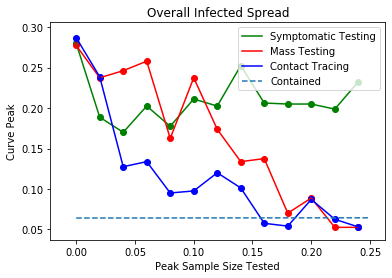

In [322]:
axisX = [0, 0.02, 0.04, 0.06, 0.08, 0.1, 0.12, 0.14, 0.16, 0.18, 0.2, 0.22, 0.24]

plt.scatter(axisX, st1, c = 'g')
plt.plot(axisX, st1, c = 'g', label = 'Symptomatic Testing')
plt.scatter(axisX, mt1, c = 'r')
plt.plot(axisX, mt1, c = 'r', label = 'Mass Testing')

plt.scatter(axisX, ct1, c = 'b')
plt.plot(axisX, ct1, c = 'b', label = 'Contact Tracing')

plt.plot([0, 0.25], [0.064, 0.0643], linestyle='dashed', label = 'Contained')
plt.legend()
plt.title("Overall Infected Spread")
plt.ylabel("Curve Peak")
plt.xlabel("Peak Sample Size Tested")

Text(0.5, 0, 'Peak Sample Size Tested')

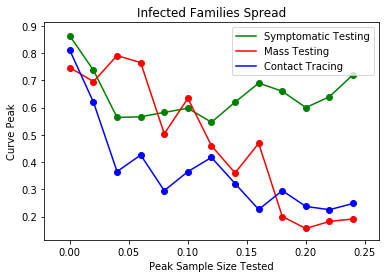

In [323]:
axisX = [0, 0.02, 0.04, 0.06, 0.08, 0.1, 0.12, 0.14, 0.16, 0.18, 0.2, 0.22, 0.24]

plt.scatter(axisX, st2, c = 'g')
plt.plot(axisX, st2, c = 'g', label = 'Symptomatic Testing')
plt.scatter(axisX, mt2, c = 'r')
plt.plot(axisX, mt2, c = 'r', label = 'Mass Testing')

plt.scatter(axisX, ct2, c = 'b')
plt.plot(axisX, ct2, c = 'b', label = 'Contact Tracing')

plt.legend()
# plt.title("Infected Families Spread")
plt.title("Infected Families Spread")
plt.ylabel("Curve Peak")
plt.xlabel("Peak Sample Size Tested")

Text(0.5, 0, 'Peak Sample Size Tested')

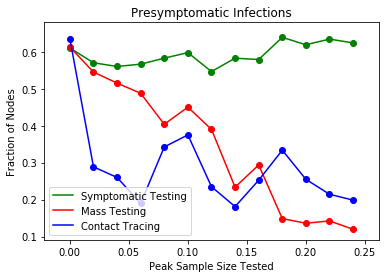

In [324]:
axisX = [0, 0.02, 0.04, 0.06, 0.08, 0.1, 0.12, 0.14, 0.16, 0.18, 0.2, 0.22, 0.24]

plt.scatter(axisX, st3, c = 'g')
plt.plot(axisX, st3, c = 'g', label = 'Symptomatic Testing')
plt.scatter(axisX, mt3, c = 'r')
plt.plot(axisX, mt3, c = 'r', label = 'Mass Testing')

plt.scatter(axisX, ct3, c = 'b')
plt.plot(axisX, ct3, c = 'b', label = 'Contact Tracing')

plt.legend()
plt.title("Presymptomatic Infections")
plt.ylabel("Fraction of Nodes")
plt.xlabel("Peak Sample Size Tested")

In [325]:
y2 = [0, 14, 21, 48, 34, 91, 233, 487, 499, 571, 647, 673, 674, 709, 729, 737, 757]
x1 = [0, 0.005, 0.01, 0.015, 0.02, 0.025, 0.03, 0.035, 0.04, 0.045, 0.05, 0.055, 0.06, 0.065, 0.07, 0.075, 0.08]

Text(0, 0.5, 'Final Size')

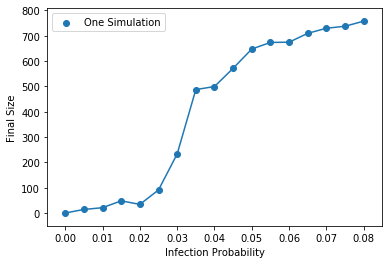

In [259]:
plt.plot(x1, y2)
plt.scatter(x1, y2, label = 'One Simulation')
# plt.title("Final Size vs. Infection Probability")

plt.legend()
plt.xlabel("Infection Probability")
plt.ylabel("Final Size")

In [255]:
y3 = [0, 0.25, 0.45, 0.83, 0.721, 1, 1.21, 1.4, 1.42, 1.45, 1.47]
x3 = [0.0125, 0.0185, 0.0235, 0.03575, 0.062, 0.125, 0.1465, 0.2175, 0.205, 0.23, 0.261]

Text(0, 0.5, 'Infected Curve Peak')

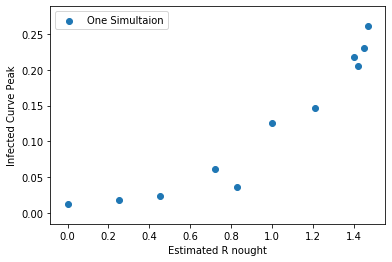

In [260]:
plt.scatter(y3, x3, label = 'One Simultaion')
plt.legend()
plt.xlabel("Estimated R nought")
plt.ylabel("Infected Curve Peak")
# plt.plot(y3, x3)

In [35]:
plt.scatter(xax, famYax, c = 'r')
plt.scatter(xax, yax, c = 'b')

NameError: name 'plt' is not defined

In [46]:
# Datasets:

In [51]:
# Figure 1 dataset:
# final size
y2 = [0, 14, 21, 48, 34, 91, 233, 487, 499, 571, 647, 673, 674, 709, 729, 737, 757]
# infection prob
x1 = [0, 0.005, 0.01, 0.015, 0.02, 0.025, 0.03, 0.035, 0.04, 0.045, 0.05, 0.055, 0.06, 0.065, 0.07, 0.075, 0.08]

# Figure 2 dataset:
# r naught value
y3 = [0, 0.25, 0.45, 0.83, 0.721, 1, 1.21, 1.4, 1.42, 1.45, 1.47]
# curve peak
x3 = [0.0125, 0.0185, 0.0235, 0.03575, 0.062, 0.125, 0.1465, 0.2175, 0.205, 0.23, 0.261]

# Figure 4 dataset:
# curve peaks
yax = [0.0125, 0.0125, 0.0125, 0.0134, 0.0125, 0.0142, 0.013, 0.018, 0.013, 0.017, 0.02, 0.02625, 0.0275, 0.0287, 0.0371, 0.0472, 0.0538, 0.0421, 0.031, 0.052,0.13, 0.083, 0.098, 0.062, 0.121, 0.132, 0.173, 0.093, 0.182, 0.212, 0.183, 0.172, 0.132, 0.221, 0.183, 0.213, 0.198, 0.243, 0.221, 0.273, 0.287, 0.263, 0.234, 0.257, 0.289, 0.297, 0.271, 0.252, 0.298, 0.312, 0.314, 0.332, 0.297, 0.263, 0.334, 0.312, 0.363, 0.388, 0.323, 0.41, 0.354, 0.372, 0.334, 0.392, 0.387, 0.392, 0.372, 0.389, 0.412, 0.412, 0.421, 0.398, 0.425, 0.423, 0.411, 0.398, 0.352, 0.425, 0.431, 0.421, 0.411, 0.421, 0.421, 0.387, 0.429, 0.423, 0.412, 0.425, 0.462, 0.412]
yeet2y = [0.0125, 0.0125, 0.01125, 0.01125, 0.01375, 0.0125, 0.0125, 0.01375, 0.01375, 0.015, 0.02, 0.01625, 0.015, 0.01625, 0.0175, 0.05125, 0.07, 0.0725, 0.06625, 0.12375, 0.08, 0.1125, 0.11875, 0.10125, 0.125, 0.14375, 0.16625, 0.15625, 0.13375, 0.19375, 0.18375, 0.1775, 0.2, 0.22125, 0.1875, 0.18375, 0.245, 0.2025, 0.205, 0.235, 0.28625, 0.26875, 0.30125, 0.312, 0.312, 0.323, 0.319, 0.347, 0.31, 0.32, 0.39, 0.42]


# Figure 7 dataset:
# family curve peaks
famYax= [0.0125, 0.0136, 0.0125, 0.0158, 0.0159, 0.0173, 0.018, 0.0163, 0.0147, 0.023, 0.02, 0.0321, 0.0219, 0.018, 0.069, 0.0875, 0.097, 0.014, 0.0121, 0.0163 ,0.165, 0.162, 0.138, 0.188, 0.199, 0.1925, 0.246, 0.233, 0.25, 0.212, 0.2537, 0.27, 0.287, 0.335, 0.319, 0.289, 0.357, 0.387, 0.396, 0.387, 0.372, 0.375, 0.391, 0.388, 0.412, 0.379, 0.372, 0.42, 0.387, 0.392, 0.421, 0.4187, 0.4276, 0.512, 0.38, 0.421, 0.421, 0.4319, 0.4197, 0.382, 0.42125, 0.43, 0.412, 0.423, 0.442, 0.376, 0.42, 0.42, 0.462, 0.451, 0.432 ,0.45, 0.46, 0.52, 0.435, 0.492, 0.512, 0.47, 0.501, 0.481, 0.521, 0.51, 0.462, 0.392, 0.521, 0.5225, 0.562, 0.503, 0.553, 0.542]

In [49]:
# Testing Datasets: Figure 10, 11, 12.
# recorded data for mass testing 



# curve peak
st1 = [0.28, 0.18875, 0.17, 0.2025, 0.1775, 0.21125, 0.2025, 0.2525, 0.20625, 0.205, 0.205, 0.1987, 0.2325]
# family curve peak
st2 = [0.863, 0.73725, 0.56375, 0.56625, 0.5825, 0.5975, 0.54624, 0.62, 0.69, 0.66, 0.6, 0.64, 0.7212]
# presymptoomatic infections
st3 = [0.61, 0.57, 0.56, 0.56625, 0.5825, 0.5975, 0.54625, 0.5825, 0.57875, 0.63875, 0.61875, 0.634, 0.62375]

# recorded data for symptomatic testing
# curve peak
mt1 = [0.2775, 0.2375, 0.24625, 0.258, 0.1625, 0.2375, 0.17375, 0.13375, 0.1375, 0.07, 0.08875, 0.0525, 0.0525]
# family curve peak
mt2 = [0.747, 0.6956, 0.7913, 0.765, 0.504, 0.634, 0.46, 0.36, 0.469, 0.2, 0.156, 0.182, 0.191]
# presymptoomatic infections
mt3 = [0.6125, 0.545, 0.515, 0.4875, 0.40375, 0.45, 0.39, 0.2337, 0.29375, 0.14875, 0.13625, 0.1425, 0.12]

# recorded data for contact tracing
# curve peak
ct1 = [0.287, 0.23875, 0.1275, 0.13375, 0.095, 0.0975, 0.12, 0.10125, 0.0575, 0.054, 0.087, 0.0625, 0.053]
# family curve peak
ct2 = [0.81, 0.62, 0.365, 0.426, 0.295, 0.365, 0.417, 0.321, 0.226, 0.295, 0.237, 0.225, 0.248]
# presymptomatic infections
ct3 = [0.635, 0.28875, 0.26, 0.19, 0.3425, 0.375, 0.235, 0.1812, 0.2525, 0.33375, 0.255, 0.2146, 0.1987]